In [1]:
import matplotlib.image as mpimg
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2
#import zipfile
from PIL import Image
  
from keras.callbacks import EarlyStopping
#from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras.utils import image_dataset_from_directory
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras import layers
from tensorflow import keras
#from layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
#from zipfile import ZipFile
  
import warnings
warnings.filterwarnings('ignore')

Input Shape 32,32 da MobileNetV2 eine 'Mindespixelanforderung' hat

In [2]:
#accesing path for dataset
data_path='c:\\ZHAW\\23FS\\KI\\DataForProject'
train_path='c:\\ZHAW\\23FS\\KI\\DataForProject\\Train'

#Variables for resizing
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3
BATCH_SIZE = 32

#Getting Total Nr of Classes from Train Folder
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [3]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + "\\" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_test = X_train
y_test = y_train


X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

In [6]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

print("X_train Type:", X_train.dtype)
print("X_valid Type", X_valid.dtype)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
X_test.shape (27446, 32, 32, 3)
y_test.shape (27446,)
X_train Type: float32
X_valid Type float32


In [7]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_valid = keras.utils.to_categorical(y_valid, NUM_CATEGORIES)

print(y_train.shape)
print(y_valid.shape)

(27446, 43)
(11763, 43)


In [8]:
IMG_SHAPE = (32, 32, 3)

# Base Model auf Baiss MobileNetV2

In [9]:
# Create the base model from the pre-trained model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               
                                               # include_top=True :Includes the fully connected layers for predictions 
                                               include_top=False,

                                               # weights from the imagenet challenge.
                                               weights='imagenet')

In [10]:
IMG_SIZE =(32,32)

# Freeze Base

In [11]:
base_model.trainable = False

In [12]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [13]:
def model():
    base_model
    return base_model

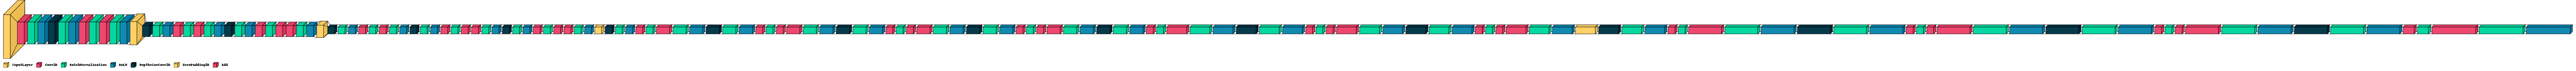

In [14]:
model1=model()
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, legend=True)

Rescale Layer mit preprocess_input!

In [15]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [16]:
#Creating data augementation layers
data_augmentation = tf.keras.Sequential([
  #layers.RandomContrast(0.5),
  layers.RandomBrightness(0.5),
  layers.RandomZoom(.5, .2)
])

In [17]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
flatten_layer = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(43, activation="softmax")

# Neues Model: Base Model + neue Layer 'obendrauf'

In [18]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [19]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 32, 32, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 32, 32, 3)        0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                             

2.3m parameter im MobileNetV2 sind frozen.
55 t parameter sind in Dense layer trainierbar.

In [21]:
len(model.trainable_variables)

2

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(X_train, X_valid, epochs=10, 
                    validation_data=(y_train, y_valid))

Error I was not able to solve

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(X_train, X_valid, epochs=10, 
                    validation_data=(y_train, y_valid))

ValueError: Data cardinality is ambiguous:
  x sizes: 27446
  y sizes: 11763
Make sure all arrays contain the same number of samples.

# Neues Model!

In [22]:
from keras.applications.mobilenet_v2 import MobileNetV2

mobilenetV2_model = tf.keras.Sequential([MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3)),
                                ])

mobilenetV2_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
_________________________________________________________________


In [23]:
final = Sequential([
    mobilenetV2_model,
    #preprocess_input,
    data_augmentation,
    global_average_layer,
    flatten_layer,
])
final.add(Dense(43, activation='softmax'))


In [24]:
final.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1, 1, 1280)        2257984   
                                                                 
 sequential (Sequential)     (None, None, None, None)  0         
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 43)                55083     
                                                                 
Total params: 2,313,067
Trainable params: 2,278,955
Non-trainable params: 34,112
_______________________________________

In [25]:
base_learning_rate = 0.0001
final.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [26]:
history = final.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
858/858 [==============================] - 207s 226ms/step - loss: 11.9368 - accuracy: 0.0931 - val_loss: 3.7291 - val_accuracy: 0.1046
Epoch 2/10
858/858 [==============================] - 185s 215ms/step - loss: 7.7433 - accuracy: 0.1879 - val_loss: 2.9070 - val_accuracy: 0.2511
Epoch 3/10
858/858 [==============================] - 188s 220ms/step - loss: 5.8208 - accuracy: 0.2748 - val_loss: 0.9300 - val_accuracy: 0.7283
Epoch 4/10
858/858 [==============================] - 194s 226ms/step - loss: 4.7726 - accuracy: 0.3352 - val_loss: 1.0886 - val_accuracy: 0.7856
Epoch 5/10
858/858 [==============================] - 196s 228ms/step - loss: 4.2706 - accuracy: 0.3778 - val_loss: 0.7805 - val_accuracy: 0.8698
Epoch 6/10
858/858 [==============================] - 177s 206ms/step - loss: 3.7084 - accuracy: 0.4032 - val_loss: 0.6949 - val_accuracy: 0.9089
Epoch 7/10
858/858 [==============================] - 191s 223ms/step - loss: 3.3493 - accuracy: 0.4311 - val_loss: 0.4736 

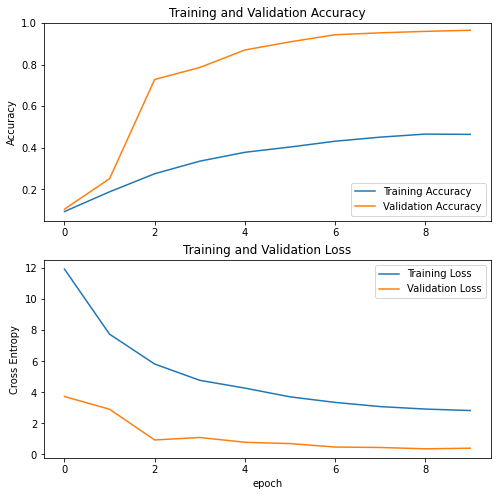

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine-Tuning
# Unfreeze base model

In [28]:
base_model.trainable = True

Fine-Tuning from 100th layer on

In [29]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


Compile again

In [30]:
final.compile(loss="categorical_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [31]:
final.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1, 1, 1280)        2257984   
                                                                 
 sequential (Sequential)     (None, None, None, None)  0         
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 43)                55083     
                                                                 
Total params: 2,313,067
Trainable params: 2,278,955
Non-trainable params: 34,112
_______________________________________

In [32]:
len(final.trainable_variables)

158

Weiter mit dem Training

In [33]:
initial_epochs = 10
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = final.fit(X_train, y_train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(X_valid, y_valid))

Epoch 10/20
858/858 [==============================] - 214s 236ms/step - loss: 1.9742 - accuracy: 0.5235 - val_loss: 0.1748 - val_accuracy: 0.9798
Epoch 11/20
858/858 [==============================] - 131s 153ms/step - loss: 1.9180 - accuracy: 0.5255 - val_loss: 0.1267 - val_accuracy: 0.9826
Epoch 12/20
858/858 [==============================] - 77s 90ms/step - loss: 1.9008 - accuracy: 0.5266 - val_loss: 0.1119 - val_accuracy: 0.9815
Epoch 13/20
858/858 [==============================] - 79s 92ms/step - loss: 1.8628 - accuracy: 0.5321 - val_loss: 0.0936 - val_accuracy: 0.9841
Epoch 14/20
858/858 [==============================] - 80s 93ms/step - loss: 1.8383 - accuracy: 0.5350 - val_loss: 0.0824 - val_accuracy: 0.9848
Epoch 15/20
858/858 [==============================] - 90s 105ms/step - loss: 1.8476 - accuracy: 0.5333 - val_loss: 0.0813 - val_accuracy: 0.9851
Epoch 16/20
858/858 [==============================] - 87s 102ms/step - loss: 1.8547 - accuracy: 0.5294 - val_loss: 0.0755 - 

In [34]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

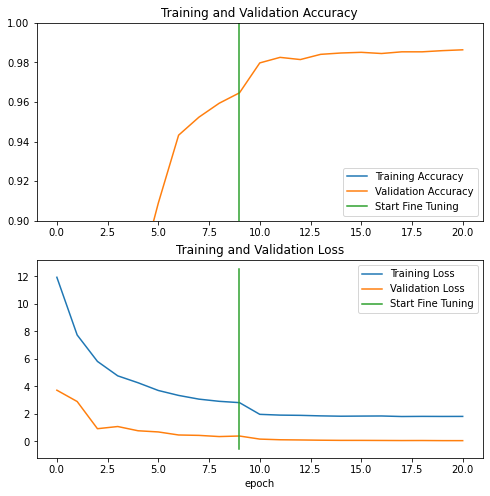

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
loss, accuracy = model.evaluate()
print('Test accuracy :', accuracy)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>